# LYVE1 vs HLAII DE

In [1]:
import diffxpy.api as diff
import scanpy as sc
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

In [2]:
ad = sc.read('immune-atlas-annotated-mac1-mac2.h5ad')
ad = ad[ad.obs.Tissue.isin(['Heart', 'Lung', 'E. mucosa'])].copy()
ad

AnnData object with n_obs × n_vars = 4427 × 16056
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'participant_id', 'Container', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Age', 'BMI', 'race_ethnicity', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'prediction', 'annotation', 'broad', 'granular', 'leiden', 'annotation_backup', 'leiden_sub', 'Tissue', 'lam_02', 'Alv. MΦ score', 'LAM score', 'ind_tissue', 'sample_tissue', 'prep_ind', 'annotation_tissue'
    var: 'gene_ids', 'Chromosome', 'gene_name', 'gene_biotype', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sex_colors', 'Tissue_colors', 'annotation_colors', 'annotation_sizes', 'broad_colors', 'dendrogram_annotation', 'dendrogram_leiden', 'granular_colors', 'hvg'

In [3]:
ad.obs['percentmito'] = ad.obs.PercentMito*100
ad.obs['logngenes'] = np.log10(ad.obs.n_genes)

In [4]:
ad.X = ad.layers['counts'].copy()
ad.obs

,n_genes,fpr,tissue,prep,individual,nGenes,nUMIs,PercentMito,PercentRibo,Age_bin,...,Tissue,lam_02,Alv. MΦ score,LAM score,ind_tissue,sample_tissue,prep_ind,annotation_tissue,percentmito,logngenes
CST01_GGAAAGCTCCGATATG-esophagusmucosa,1278,0.1,esophagusmucosa,CST,01,1278,1772.0,0.000000,0.001693,21-40,...,E. mucosa,Mac,0.324844,0.168985,E. mucosa-GTEX-16BQI,E. mucosa-CST-01,CST-01,MΦ LYVE1 hi_E. mucosa,0.000000,3.106531
CST01_CCGTGGATCTGCCCTA-esophagusmucosa,1250,0.1,esophagusmucosa,CST,01,1250,1645.0,0.000000,0.001824,21-40,...,E. mucosa,Mac,0.071278,-0.279898,E. mucosa-GTEX-16BQI,E. mucosa-CST-01,CST-01,MΦ LYVE1 hi_E. mucosa,0.000000,3.096910
CST01_GAGCAGAGTCGGCATC-esophagusmucosa,881,0.1,esophagusmucosa,CST,01,881,1130.0,0.000000,0.003540,21-40,...,E. mucosa,Mac,0.060210,-0.182156,E. mucosa-GTEX-16BQI,E. mucosa-CST-01,CST-01,MΦ LYVE1 hi_E. mucosa,0.000000,2.944976
CST01_AAAGATGCATTACGAC-esophagusmucosa,904,0.1,esophagusmucosa,CST,01,904,1123.0,0.000000,0.000890,21-40,...,E. mucosa,Mac,-0.026431,0.055949,E. mucosa-GTEX-16BQI,E. mucosa-CST-01,CST-01,MΦ LYVE1 hi_E. mucosa,0.000000,2.956168
CST01_CAGCATATCCACGTTC-esophagusmucosa,833,0.1,esophagusmucosa,CST,01,833,1045.0,0.000000,0.000957,21-40,...,E. mucosa,Mac,0.031342,-0.256586,E. mucosa-GTEX-16BQI,E. mucosa-CST-01,CST-01,MΦ LYVE1 hi_E. mucosa,0.000000,2.920645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TST03_TGCTACCTCATGTCTT-lung,461,0.1,lung,TST,03,461,546.0,0.012821,0.001832,41-50,...,Lung,Mac,0.257236,0.143927,Lung-GTEX-13N11,Lung-TST-03,TST-03,MΦ LYVE1 hi_Lung,1.282051,2.663701
TST03_TCTTTCCTCCAGTATG-lung,352,0.1,lung,TST,03,352,500.0,0.000000,0.000000,41-50,...,Lung,Mac,0.238414,0.679038,Lung-GTEX-13N11,Lung-TST-03,TST-03,MΦ LYVE1 hi_Lung,0.000000,2.546543
TST03_GATGCTAAGTGTGGCA-lung,421,0.1,lung,TST,03,421,505.0,0.000000,0.000000,41-50,...,Lung,Mac,-0.230436,-0.150223,Lung-GTEX-13N11,Lung-TST-03,TST-03,MΦ LYVE1 hi_Lung,0.000000,2.624282
TST03_CATGACAAGCTAGTTC-lung,374,0.1,lung,TST,03,374,473.0,0.000000,0.002114,41-50,...,Lung,Mac,1.111014,-0.113451,Lung-GTEX-13N11,Lung-TST-03,TST-03,MΦ LYVE1 hi_Lung,0.000000,2.572872


In [8]:
alpha_df = pd.DataFrame(ad.X.A!=0, index=ad.obs_names, columns=ad.var_names).groupby([ad.obs.Tissue, ad.obs.annotation]).mean().reset_index().melt(['Tissue', 'annotation'], var_name='gene', value_name='alpha')
alpha_df['Tissue'] = alpha_df['Tissue'].astype(str)
alpha_df['annotation'] = alpha_df['annotation'].astype(str)
alpha_df

,Tissue,annotation,gene,alpha
0,E. mucosa,MΦ HLAII hi,FO538757.2,0.200000
1,E. mucosa,MΦ LYVE1 hi,FO538757.2,0.135359
2,Heart,MΦ HLAII hi,FO538757.2,0.089655
3,Heart,MΦ LYVE1 hi,FO538757.2,0.068115
4,Lung,MΦ HLAII hi,FO538757.2,0.178177
...,...,...,...,...
96331,E. mucosa,MΦ LYVE1 hi,PRMT2,0.162983
96332,Heart,MΦ HLAII hi,PRMT2,0.287356
96333,Heart,MΦ LYVE1 hi,PRMT2,0.175258
96334,Lung,MΦ HLAII hi,PRMT2,0.334254


In [9]:
alpha_df = alpha_df.pivot(['Tissue', 'gene'], 'annotation', 'alpha').reset_index()

In [10]:
alpha_df

annotation,Tissue,gene,MΦ HLAII hi,MΦ LYVE1 hi
0,E. mucosa,A1BG,0.000000,0.008287
1,E. mucosa,A1CF,0.000000,0.000000
2,E. mucosa,A2M,0.040000,0.022099
3,E. mucosa,A2ML1,0.000000,0.002762
4,E. mucosa,A3GALT2,0.000000,0.000000
...,...,...,...,...
48163,Lung,ZYG11A,0.015193,0.000000
48164,Lung,ZYG11B,0.276243,0.109091
48165,Lung,ZYX,0.178177,0.036364
48166,Lung,ZZEF1,0.250000,0.115152


In [11]:
ad.obs.annotation.cat.categories

Index(['MΦ HLAII hi', 'MΦ LYVE1 hi'], dtype='object')

In [ ]:
%%time

models = {}

for t in ['Heart', 'Lung']:

    x = ad[ad.obs.Tissue == t].copy()

    test = diff.test.wald(
        data=x,
        formula_loc='~ 1 + annotation + participant_id + prep + logngenes',
        as_numeric=['logngenes'],
        factor_loc_totest='annotation',
    )
    models[t] = test

t = 'E. mucosa'
x = ad[ad.obs.Tissue == t].copy()

test = diff.test.wald(
    data=x,
    formula_loc='~ 1 + annotation + logngenes',
    as_numeric=['logngenes'],
    factor_loc_totest='annotation',
)
models[t] = test

In [13]:
de = pd.concat([v.summary().assign(Tissue=k) for k,v in models.items()], axis=0)
de = de.merge(alpha_df)
de['neglog_pval_adj'] = -np.log10(de.qval+1e-15)
de['alpha_difference'] = de['MΦ LYVE1 hi'] - de['MΦ MHCII hi']
de['significant'] = (de.qval<0.05) & (de.log2fc.abs()>1) & (((de.coef_mle>0) & (de['MΦ LYVE1 hi']>.05) & (de['MΦ LYVE1 hi']>de['MΦ MHCII hi']))|((de.coef_mle<0) & (de['MΦ MHCII hi']>.05) & (de['MΦ MHCII hi']>de['MΦ LYVE1 hi'])))
de['undetected'] = (de['MΦ LYVE1 hi']<0.05) & (de['MΦ MHCII hi']<0.05)
de

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll,Tissue,MΦ LYVE1 hi,MΦ MHCII hi,neglog_pval_adj,alpha_difference,significant,undetected
0,FO538757.2,0.120479,0.406464,0.312935,0.075532,False,2.392123e-09,0.312935,0.201534,-841.430100,Heart,0.068115,0.089655,3.909776e-01,-0.021540,False,False
1,SAMD11,0.927027,1.000000,2.919030,0.000317,False,4.834800e-04,2.919030,31.872158,-5.853704,Heart,0.000368,0.000000,-4.821637e-16,0.000368,False,True
2,NOC2L,0.234119,0.595381,-0.350872,0.031419,False,2.877289e-10,-0.350872,0.294896,-431.747106,Heart,0.026510,0.055172,2.252050e-01,-0.028663,False,False
3,KLHL17,0.090971,0.341746,-1.475628,0.004126,False,5.025225e-04,-1.475628,0.872998,-78.506241,Heart,0.003682,0.006897,4.662964e-01,-0.003215,False,True
4,PLEKHN1,0.000000,0.000000,-7.405923,0.000317,False,1.492535e+02,-7.405923,0.045659,-33.646428,Heart,0.000000,0.002299,1.500000e+01,-0.002299,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48163,C21orf58,0.909888,1.000000,6.290603,0.005168,False,1.388368e-04,6.290603,55.580371,-12.307756,E. mucosa,0.005525,0.000000,-4.821637e-16,0.005525,False,True
48164,PCNT,0.854555,1.000000,7.596724,0.023256,False,7.001709e-05,7.596724,41.441936,-40.837095,E. mucosa,0.024862,0.000000,-4.821637e-16,0.024862,False,True
48165,DIP2A,0.479490,1.000000,-0.331973,0.111111,False,7.365031e-06,-0.331973,0.469469,-133.893606,E. mucosa,0.093923,0.240000,-4.821637e-16,-0.146077,False,False
48166,S100B,0.992472,1.000000,13.854556,0.005168,False,2.125728e-07,13.854556,1468.404998,-10.895581,E. mucosa,0.005525,0.000000,-4.821637e-16,0.005525,False,True


In [32]:
de.to_pickle('mac1-mac2-de.pkl')

In [12]:
de = pd.read_pickle('mac1-mac2-de.pkl')

In [13]:
de[de.significant & (de.coef_mle>0)].sort_values(['qval', 'coef_mle', 'alpha_difference'], ascending=[True, False, False]).to_excel('nb_de_mac1_genes.xlsx', index=False)

In [14]:
de[de.significant & (de.coef_mle<0)].sort_values(['qval', 'coef_mle', 'alpha_difference'], ascending=[True, True, False]).to_excel('nb_de_mac2_genes.xlsx', index=False)

In [15]:
de.significant.sum()

999

In [16]:
de

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll,Tissue,MΦ 1,MΦ 2,neglog_pval_adj,alpha_difference,significant,undetected
0,FO538757.2,0.120479,0.406464,0.312935,0.075532,False,2.392123e-09,0.312935,0.201534,-841.430100,Heart,0.068115,0.089655,3.909776e-01,-0.021540,False,False
1,SAMD11,0.927027,1.000000,2.919030,0.000317,False,4.834800e-04,2.919030,31.872158,-5.853704,Heart,0.000368,0.000000,-4.821637e-16,0.000368,False,True
2,NOC2L,0.234119,0.595381,-0.350872,0.031419,False,2.877289e-10,-0.350872,0.294896,-431.747106,Heart,0.026510,0.055172,2.252050e-01,-0.028663,False,False
3,KLHL17,0.090971,0.341746,-1.475628,0.004126,False,5.025225e-04,-1.475628,0.872998,-78.506241,Heart,0.003682,0.006897,4.662964e-01,-0.003215,False,True
4,PLEKHN1,0.000000,0.000000,-7.405923,0.000317,False,1.492535e+02,-7.405923,0.045659,-33.646428,Heart,0.000000,0.002299,1.500000e+01,-0.002299,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48163,C21orf58,0.909888,1.000000,6.290603,0.005168,False,1.388368e-04,6.290603,55.580371,-12.307756,E. mucosa,0.005525,0.000000,-4.821637e-16,0.005525,False,True
48164,PCNT,0.854555,1.000000,7.596724,0.023256,False,7.001709e-05,7.596724,41.441936,-40.837095,E. mucosa,0.024862,0.000000,-4.821637e-16,0.024862,False,True
48165,DIP2A,0.479490,1.000000,-0.331973,0.111111,False,7.365031e-06,-0.331973,0.469469,-133.893606,E. mucosa,0.093923,0.240000,-4.821637e-16,-0.146077,False,False
48166,S100B,0.992472,1.000000,10.000000,0.005168,False,2.125728e-07,13.854556,1468.404998,-10.895581,E. mucosa,0.005525,0.000000,-4.821637e-16,0.005525,False,True


In [15]:
pd.crosstab(de.significant, de.Tissue)

Tissue,E. mucosa,Heart,Lung
significant,,,
False,15882,15652,15635
True,174,404,421


In [16]:
ad.uns['Tissue_colors']

array(['#67c1a4', '#e3191c', '#fa9a99'], dtype=object)

In [82]:
markers = [
 'F13A1',
 'MRC1',
 'SEPP1',
 'LYVE1',
 'PTPRG',
 'HDAC9',
 'WWP1',
 'CSGALNACT1',
 'RASSF4',
 'MARCO',
 'CD209',
 'CLEC7A',
 'IL1R2',
 'CD68',
 'HLA-A',
 'PSAP',
 'HLA-DRA',
 'MMP14',
 'LY6E',
 'APOO',
 'CD9',
 'CD36',
 'FCN1',
 'IL18R1',
]

In [83]:
markers2 = {
    'Lung': ['CALCR', 'RBPJ', 'STAB1', 'LGMN', 'LYZ', 'CST3', 'C1QA', 'C1QB', 'C1QC'],
    'Heart': ['SIGLEC1', 'FGF13', 'FABP5', 'LPL','C1QA', 'C1QB', 'C1QC'],
    'E. mucosa': ['RPBJ', 'NKG7', 'APOE','C1QA', 'C1QB', 'C1QC'],
}

In [84]:
markers = markers + [y for x in markers2.values() for y in x]

In [85]:
xlimit = 10

de.log2fc.loc[de.log2fc>xlimit] = xlimit
de.log2fc.loc[de.log2fc<-xlimit] = -xlimit

/home/gokcen/.miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 18 x 5 in image.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure/SFigure3-1J.pdf


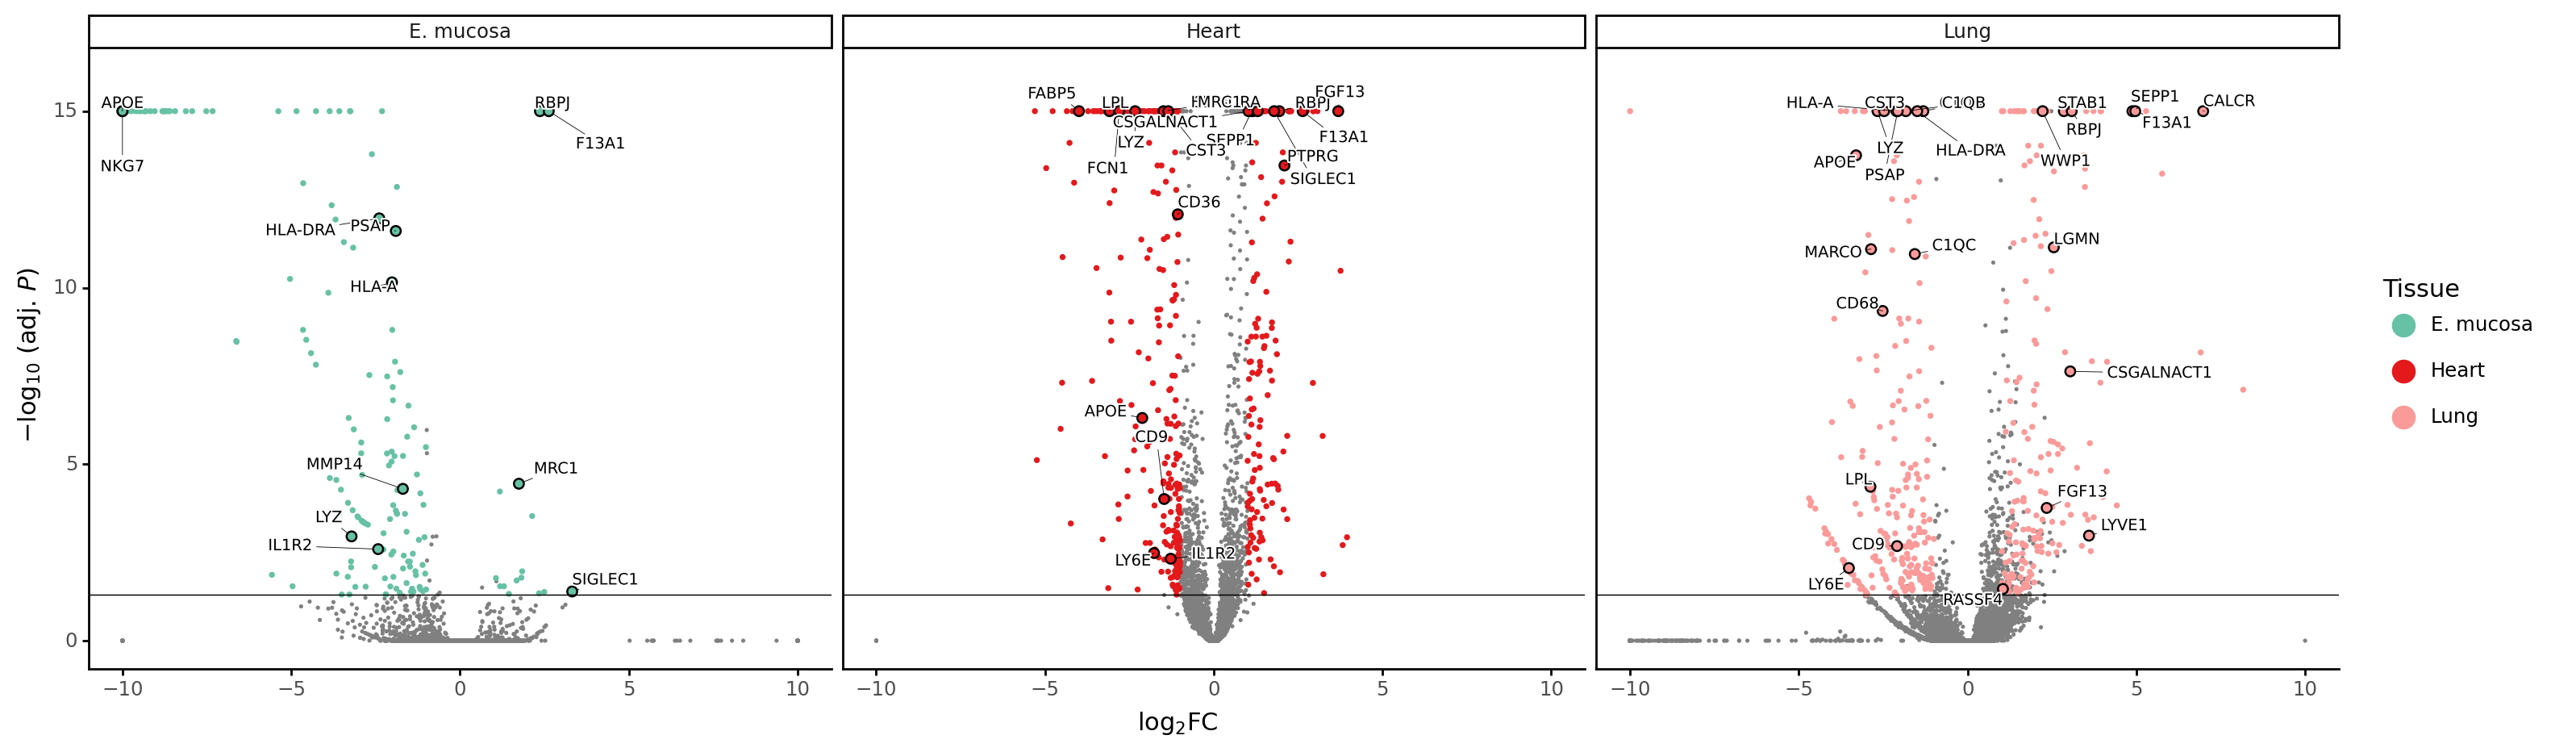

<ggplot: (8738428706036)>

In [89]:
from plotnine import *
import matplotlib.patheffects as pe

df_text_idx = (de.significant) & de.gene.isin(markers)
de[df_text_idx].to_pickle('mac1-mac2-highlight-DE-genes.pkl')
g = (
    ggplot(aes(x='log2fc', y='neglog_pval_adj'), data=de[de.significant]) + 
    geom_point(size=0.05, data=de[(~de.significant) & (~de.undetected)], color='gray') +    
    geom_point(aes(color='Tissue'), size=0.5, data=de[de.significant&(~df_text_idx)]) +
    geom_point(aes(fill='Tissue'), color='black', size=2, data=de[de.significant&(df_text_idx)]) +    
    geom_hline(yintercept=(-np.log10(0.05)), size=0.3) +    
    geom_text(aes(label='gene'), size=7, color='black', fontweight='normal', data=de[df_text_idx],
              path_effects=[pe.Stroke(linewidth=1.5, foreground='white'),pe.Normal()],
              adjust_text=
              {
                  'arrowprops':{'arrowstyle': '-', 'lw':0.3}, 
                  'x':de[de.significant].log2fc.values, 
                  'y':de[de.significant].neglog_pval_adj.values, 
                  'expand_points': (1,1.5),
              }
    ) + 
    theme_classic() + 
    facet_wrap('Tissue') +
    theme(figure_size=(18,5)) +
    labs(x='$\log_{2}$FC', y='$-\log_{10}$ (adj. $P$)', color='Tissue') +
    scale_color_manual(values=ad.uns['Tissue_colors']) +
    scale_fill_manual(values=ad.uns['Tissue_colors']) +    
    coord_cartesian(xlim=(-xlimit, xlimit), ylim=(None, 16))+
    guides(color = guide_legend(override_aes = dict(size=5)), fill=None)
)

ggsave(g, 'figure/SFigure3-1J.pdf')

g

In [638]:
de['mac1mac2'] = ['MΦ2' if x<0 else 'MΦ1' for x in de.coef_mle]
de

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll,Tissue,MΦ 1,MΦ 2,neglog_pval_adj,alpha_difference,significant,undetected,mac1mac2
0,FO538757.2,0.120479,0.406464,0.312935,0.075532,False,2.392123e-09,0.312935,0.201534,-841.430100,Heart,0.068115,0.089655,3.909776e-01,-0.021540,False,False,MΦ1
1,SAMD11,0.927027,1.000000,2.919030,0.000317,False,4.834800e-04,2.919030,31.872158,-5.853704,Heart,0.000368,0.000000,-4.821637e-16,0.000368,False,True,MΦ1
2,NOC2L,0.234119,0.595381,-0.350872,0.031419,False,2.877289e-10,-0.350872,0.294896,-431.747106,Heart,0.026510,0.055172,2.252050e-01,-0.028663,False,False,MΦ2
3,KLHL17,0.090971,0.341746,-1.475628,0.004126,False,5.025225e-04,-1.475628,0.872998,-78.506241,Heart,0.003682,0.006897,4.662964e-01,-0.003215,False,True,MΦ2
4,PLEKHN1,0.000000,0.000000,-7.405923,0.000317,False,1.492535e+02,-7.405923,0.045659,-33.646428,Heart,0.000000,0.002299,1.500000e+01,-0.002299,False,True,MΦ2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48163,C21orf58,0.909888,1.000000,6.290603,0.005168,False,1.388368e-04,6.290603,55.580371,-12.307756,E. mucosa,0.005525,0.000000,-4.821637e-16,0.005525,False,True,MΦ1
48164,PCNT,0.854555,1.000000,7.596724,0.023256,False,7.001709e-05,7.596724,41.441936,-40.837095,E. mucosa,0.024862,0.000000,-4.821637e-16,0.024862,False,True,MΦ1
48165,DIP2A,0.479490,1.000000,-0.331973,0.111111,False,7.365031e-06,-0.331973,0.469469,-133.893606,E. mucosa,0.093923,0.240000,-4.821637e-16,-0.146077,False,False,MΦ2
48166,S100B,0.992472,1.000000,10.000000,0.005168,False,2.125728e-07,13.854556,1468.404998,-10.895581,E. mucosa,0.005525,0.000000,-4.821637e-16,0.005525,False,True,MΦ1


In [639]:
de[de.significant & (de.coef_mle>0)].sort_values(['qval', 'coef_mle', 'alpha_difference'], ascending=[True, False, False])

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll,Tissue,MΦ 1,MΦ 2,neglog_pval_adj,alpha_difference,significant,undetected,mac1mac2
22251,CALCR,0.000000,0.000000,6.979407,0.020247,False,4.540368e-07,6.979407,2.222759e-162,-60.933924,Lung,0.060606,0.008287,15.000000,0.052319,True,False,MΦ1
18317,NCKAP5,0.000000,0.000000,5.287081,0.202475,False,5.181370e-08,5.287081,5.584263e-01,-300.093320,Lung,0.272727,0.053867,15.000000,0.218860,True,False,MΦ1
21047,F13A1,0.000000,0.000000,4.967471,0.849269,False,2.789735e-06,4.967471,3.141598e-01,-519.317420,Lung,0.812121,0.019337,15.000000,0.792784,True,False,MΦ1
20430,SEPP1,0.000000,0.000000,4.883375,0.125984,False,8.463499e-07,4.883375,5.510815e-01,-213.099312,Lung,0.381818,0.004144,15.000000,0.377675,True,False,MΦ1
26426,KCNMB4,0.000000,0.000000,3.955482,0.026997,False,4.346330e-07,3.955482,2.222759e-162,-82.101464,Lung,0.066667,0.015193,15.000000,0.051473,True,False,MΦ1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36283,PDGFC,0.001012,0.041540,2.498331,0.540052,False,5.859302e-09,2.498331,7.599990e-01,-368.458693,E. mucosa,0.359116,0.040000,1.381532,0.319116,True,False,MΦ1
2508,CD28,0.006013,0.044781,1.489039,0.063155,False,3.279020e-08,1.489039,5.420483e-01,-667.591895,Heart,0.063328,0.006897,1.348903,0.056432,True,False,MΦ1
43456,SPTLC2,0.001127,0.045474,2.343132,0.351421,False,1.714727e-08,2.343132,7.194837e-01,-263.908791,E. mucosa,0.276243,0.080000,1.342239,0.196243,True,False,MΦ1
22764,GPR34,0.003491,0.045639,1.483082,0.073116,False,1.656899e-08,1.483082,5.077536e-01,-223.208179,Lung,0.084848,0.062155,1.340667,0.022694,True,False,MΦ1


## GO enrichment

In [56]:
n_genes = 1000
fdr_cutoff = 0.1

go_res_list = []

for t in tqdm(['Lung', 'Heart', 'E. mucosa']):
    mac1 = de[de.significant & (de.coef_mle>0) & (de.Tissue == t)].sort_values(['qval', 'coef_mle', 'alpha_difference'], ascending=[True, False, False]).gene[:n_genes]
    mac2 = de[de.significant & (de.coef_mle<0) & (de.Tissue == t)].sort_values(['qval', 'coef_mle', 'alpha_difference'], ascending=[True, True, False]).gene[:n_genes]

    for name, mac in [('MΦ 1', mac1), ('MΦ 2', mac2)]:
        
        enrich_df = sc.queries.enrich(mac.values.tolist(), gprofiler_kwargs={'no_evidences': False, 'ordered': True, 'all_results': True})
        enrich_df['significant'] = enrich_df['p_value'] < fdr_cutoff
        enrich_df = enrich_df[~enrich_df.source.isin(['TF', 'KEGG', 'REAC','WP', 'MIRNA', 'HP', 'HPA', 'GO:MF', 'GO:CC', 'CORUM'])].copy()
        enrich_df = enrich_df[enrich_df.term_size<5000]
        enrich_df['name'] = [x[0].upper() + x[1:] for x in enrich_df['name']]
        enrich_df['neglog10_pval'] = -np.log10(enrich_df['p_value'])
        enrich_df['mac_group'] = name
        enrich_df['tissue'] = t
        
        go_res_list.append(enrich_df.copy())

  0%|          | 0/3 [00:00<?, ?it/s]

In [57]:
go_res = pd.concat(go_res_list, axis=0).reset_index(drop=True)

In [58]:
go_res.loc[go_res[go_res.significant].groupby(['source', 'native', 'name'])['p_value'].idxmin()].mac_group.value_counts()

MΦ 2    474
MΦ 1     37
Name: mac_group, dtype: int64

In [580]:
go_res.loc[go_res[go_res.significant].groupby(['source', 'native', 'name'])['p_value'].idxmin()].mac_group.value_counts()

MΦ 2    475
MΦ 1     30
Name: mac_group, dtype: int64

In [59]:
go_res_mac2 = go_res[(go_res.p_value<0.05) & (go_res.mac_group == 'MΦ 2')].copy()
go_res_mac1 = go_res[(go_res.p_value<0.1) & (go_res.mac_group == 'MΦ 1')].copy()

In [62]:
mac2_genes = go_res_mac2.intersections.explode().unique()
mac1_genes = go_res_mac2.intersections.explode().unique()

## Mac1 GO

In [67]:
rev_df1 = pd.read_csv('mac1-revigo-medium.csv', skipinitialspace=True)
rev_df1.columns = rev_df1.columns.str.lower()
rev_df1.name = rev_df1.name.str.replace('"', '')
rev_df1.name = [x[0].upper() + x[1:] for x in rev_df1.name]

In [68]:
go_res_mac1 = go_res_mac1.merge(rev_df1[['eliminated', 'termid']], left_on='native', right_on='termid', how='left')
go_res_mac1.eliminated.fillna(True, inplace=True)

In [69]:
ordered_terms = go_res_mac1.loc[go_res_mac1.groupby('native', sort=False, observed=True).p_value.idxmin()].sort_values('p_value').name

In [70]:
el_terms = go_res_mac1.groupby('name').eliminated.all()
el_terms = el_terms[el_terms].index
el_terms = el_terms.tolist() + ['Behavior']

ordered_terms = ordered_terms[~ordered_terms.isin(el_terms)]

In [71]:
go_res_mac1 = go_res_mac1.merge(go_res_mac1.groupby('native', sort=False, observed=True, as_index=False)[['intersections']].agg('sum').rename(columns={'intersections': 'intersections_append'}), on='native')
go_res_mac1['intersections_append'] = [pd.Series(x).drop_duplicates().tolist() for x in go_res_mac1['intersections_append']]

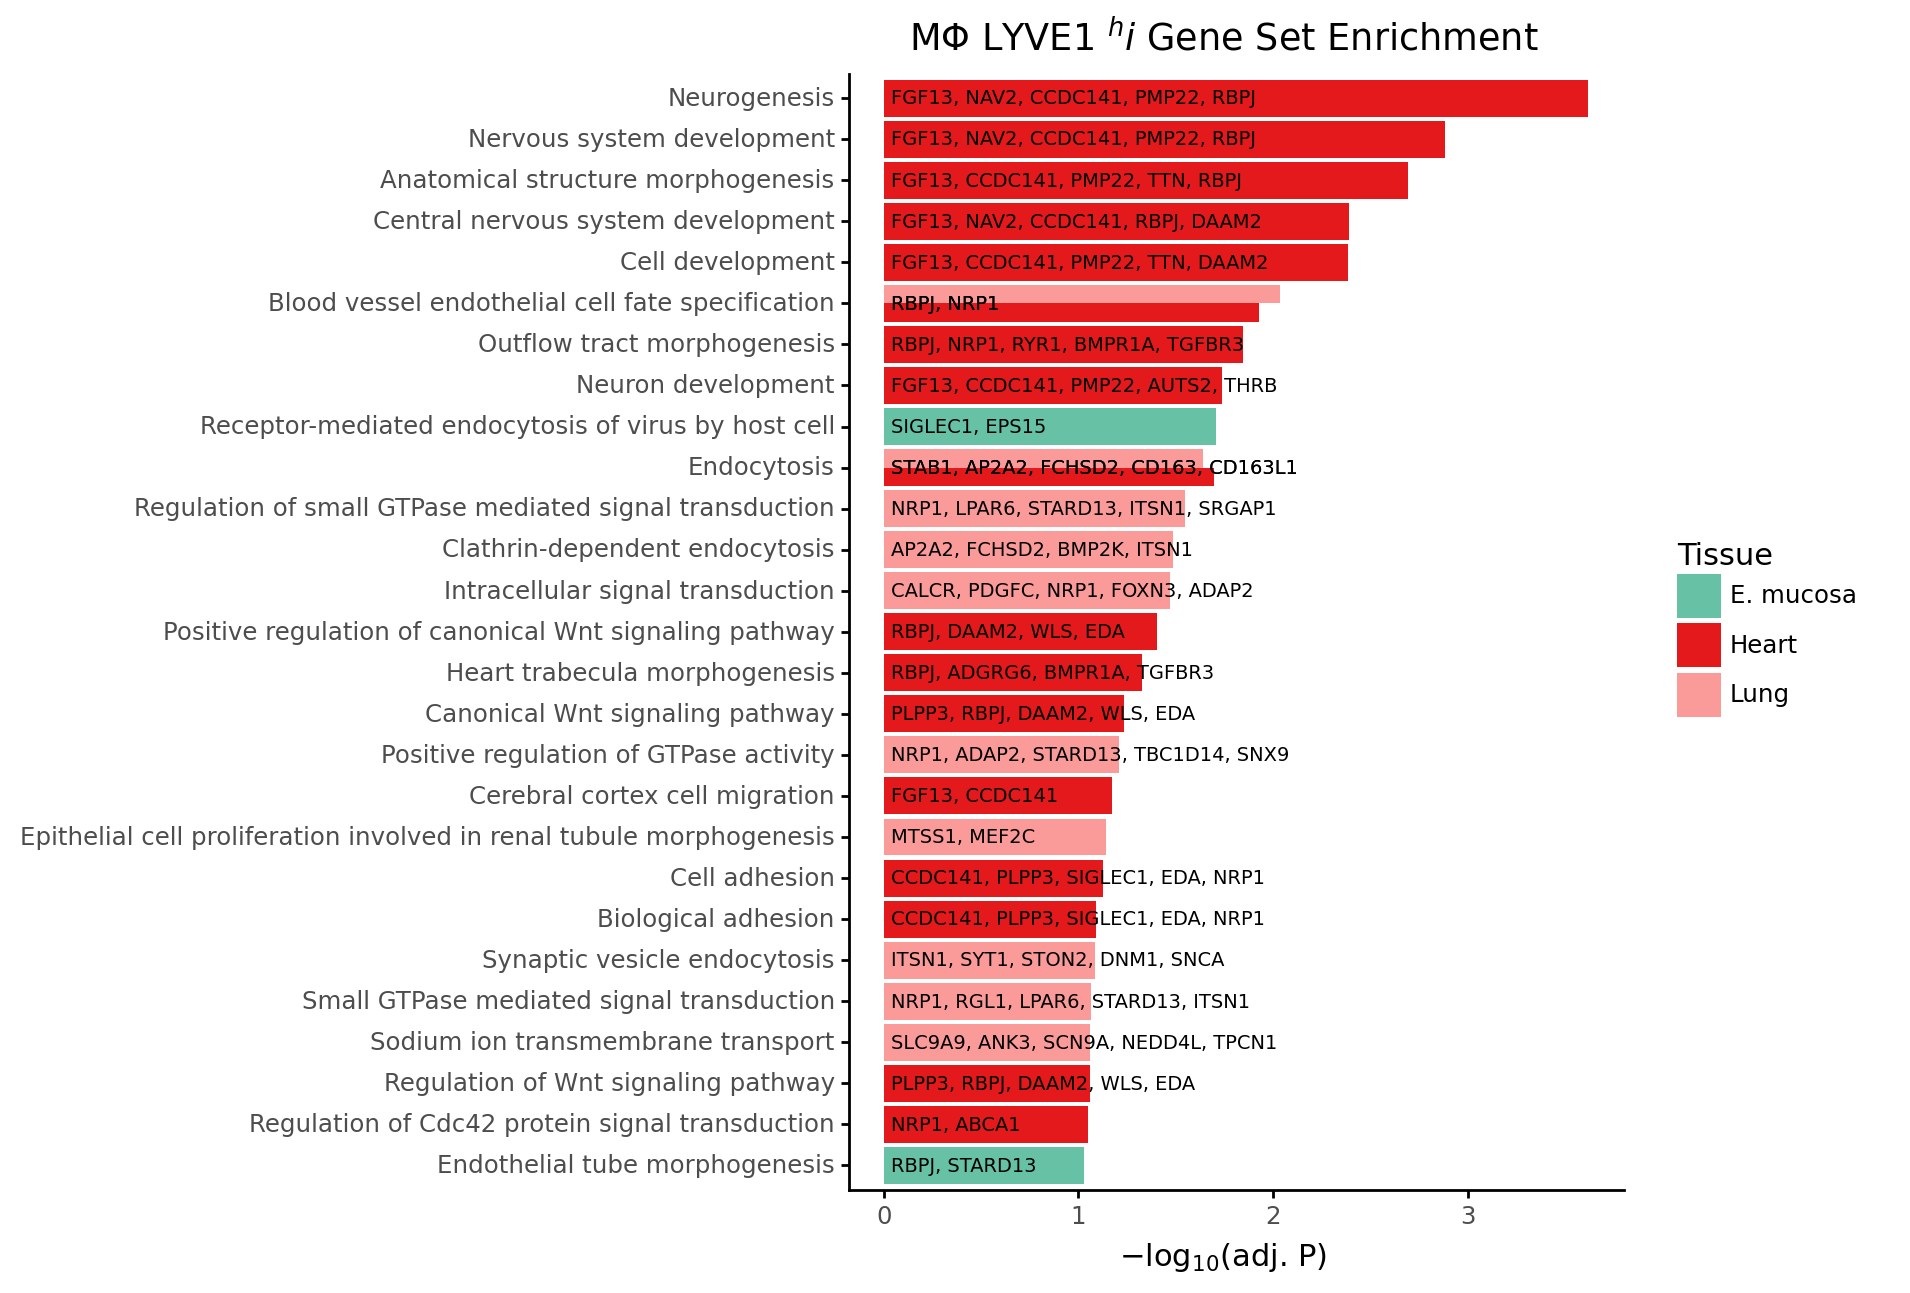

<ggplot: (8738494229944)>

/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 5 x 7.25 in image.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure/SFigure3-1K1.pdf


In [72]:
from plotnine import *

import matplotlib.patheffects as path_effects
pe = [path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()]

en_df = go_res_mac1[go_res_mac1.name.isin(ordered_terms)].copy()
en_df['tissue'] = pd.Categorical(en_df['tissue'], categories=ad.obs.Tissue.cat.categories)
en_df['intersections_append'] = [', '.join(x[:5]) for x in en_df.intersections_append]
#en_df['name'] = en_df['name'].astype(str) + ' ' + en_df['intersections'].astype(str)

#en_df = en_df.drop_duplicates('name')#[:20]
en_df['name'] = pd.Categorical(en_df['name'], categories=ordered_terms, ordered=True)

figsize = (5,len(en_df)/4)
text_start = (en_df.neglog10_pval.max()*0.01)

g = (
    ggplot(en_df, aes(x='name', y='neglog10_pval')) + 
    geom_bar(aes(fill='tissue'), stat='identity', position='dodge') + 
    #geom_hline(yintercept=1, size=0.1) +     
    geom_text(aes(x='name', y=text_start, label='intersections_append'), size=7, fontweight='normal', color='black', ha='left', data=en_df[['name', 'neglog10_pval', 'tissue', 'intersections_append']].drop_duplicates())+ #, path_effects=pe) +
    coord_flip() + 
    scale_x_discrete(limits=list(reversed(en_df.name.cat.categories))) +
    scale_fill_manual(ad.uns['tissue_colors']) +
    labs(fill='Tissue') +
    theme_classic() +
    theme(figure_size=figsize, panel_spacing_x=1) +
    labs(y='$-\log_{10}$(adj. P)', x='', title='M$\Phi$ LYVE1 $^hi$ Gene Set Enrichment')
)

display(g)

ggsave(g, 'figure/SFigure3-1K1.pdf')

## Mac 2 GO

In [651]:
rev_df2 = pd.concat([
    pd.read_csv('mac2-revigo-lung-small.csv', skipinitialspace=True).assign(tissue='Lung'),
    pd.read_csv('mac2-revigo-heart-small.csv', skipinitialspace=True).assign(tissue='Heart'),
    pd.read_csv('mac2-revigo-mucosa-small.csv', skipinitialspace=True).assign(tissue='E. mucosa'),
], axis=0).reset_index(drop=True)
rev_df2.columns = rev_df2.columns.str.lower()
rev_df2.name = rev_df2.name.str.replace('"', '')
rev_df2.name = [x[0].upper() + x[1:] for x in rev_df2.name]

In [652]:
go_res_mac2 = go_res_mac2.merge(rev_df2[['eliminated', 'termid']], left_on='native', right_on='termid', how='left')
go_res_mac2.eliminated.fillna(True, inplace=True)

In [653]:
ordered_terms = go_res_mac2.loc[go_res_mac2.groupby('native', sort=False, observed=True).p_value.idxmin()].sort_values('p_value').name

In [654]:
el_terms = go_res_mac2.groupby('name').eliminated.all()
el_terms = el_terms[el_terms].index
el_terms = el_terms.tolist() + ['Behavior']

ordered_terms = ordered_terms[~ordered_terms.isin(el_terms)][:27]

In [655]:
go_res_mac2 = go_res_mac2.merge(go_res_mac2.groupby('native', sort=False, observed=True, as_index=False)[['intersections']].agg('sum').rename(columns={'intersections': 'intersections_append'}), on='native')
go_res_mac2['intersections_append'] = [pd.Series(x).drop_duplicates().tolist() for x in go_res_mac2['intersections_append']]

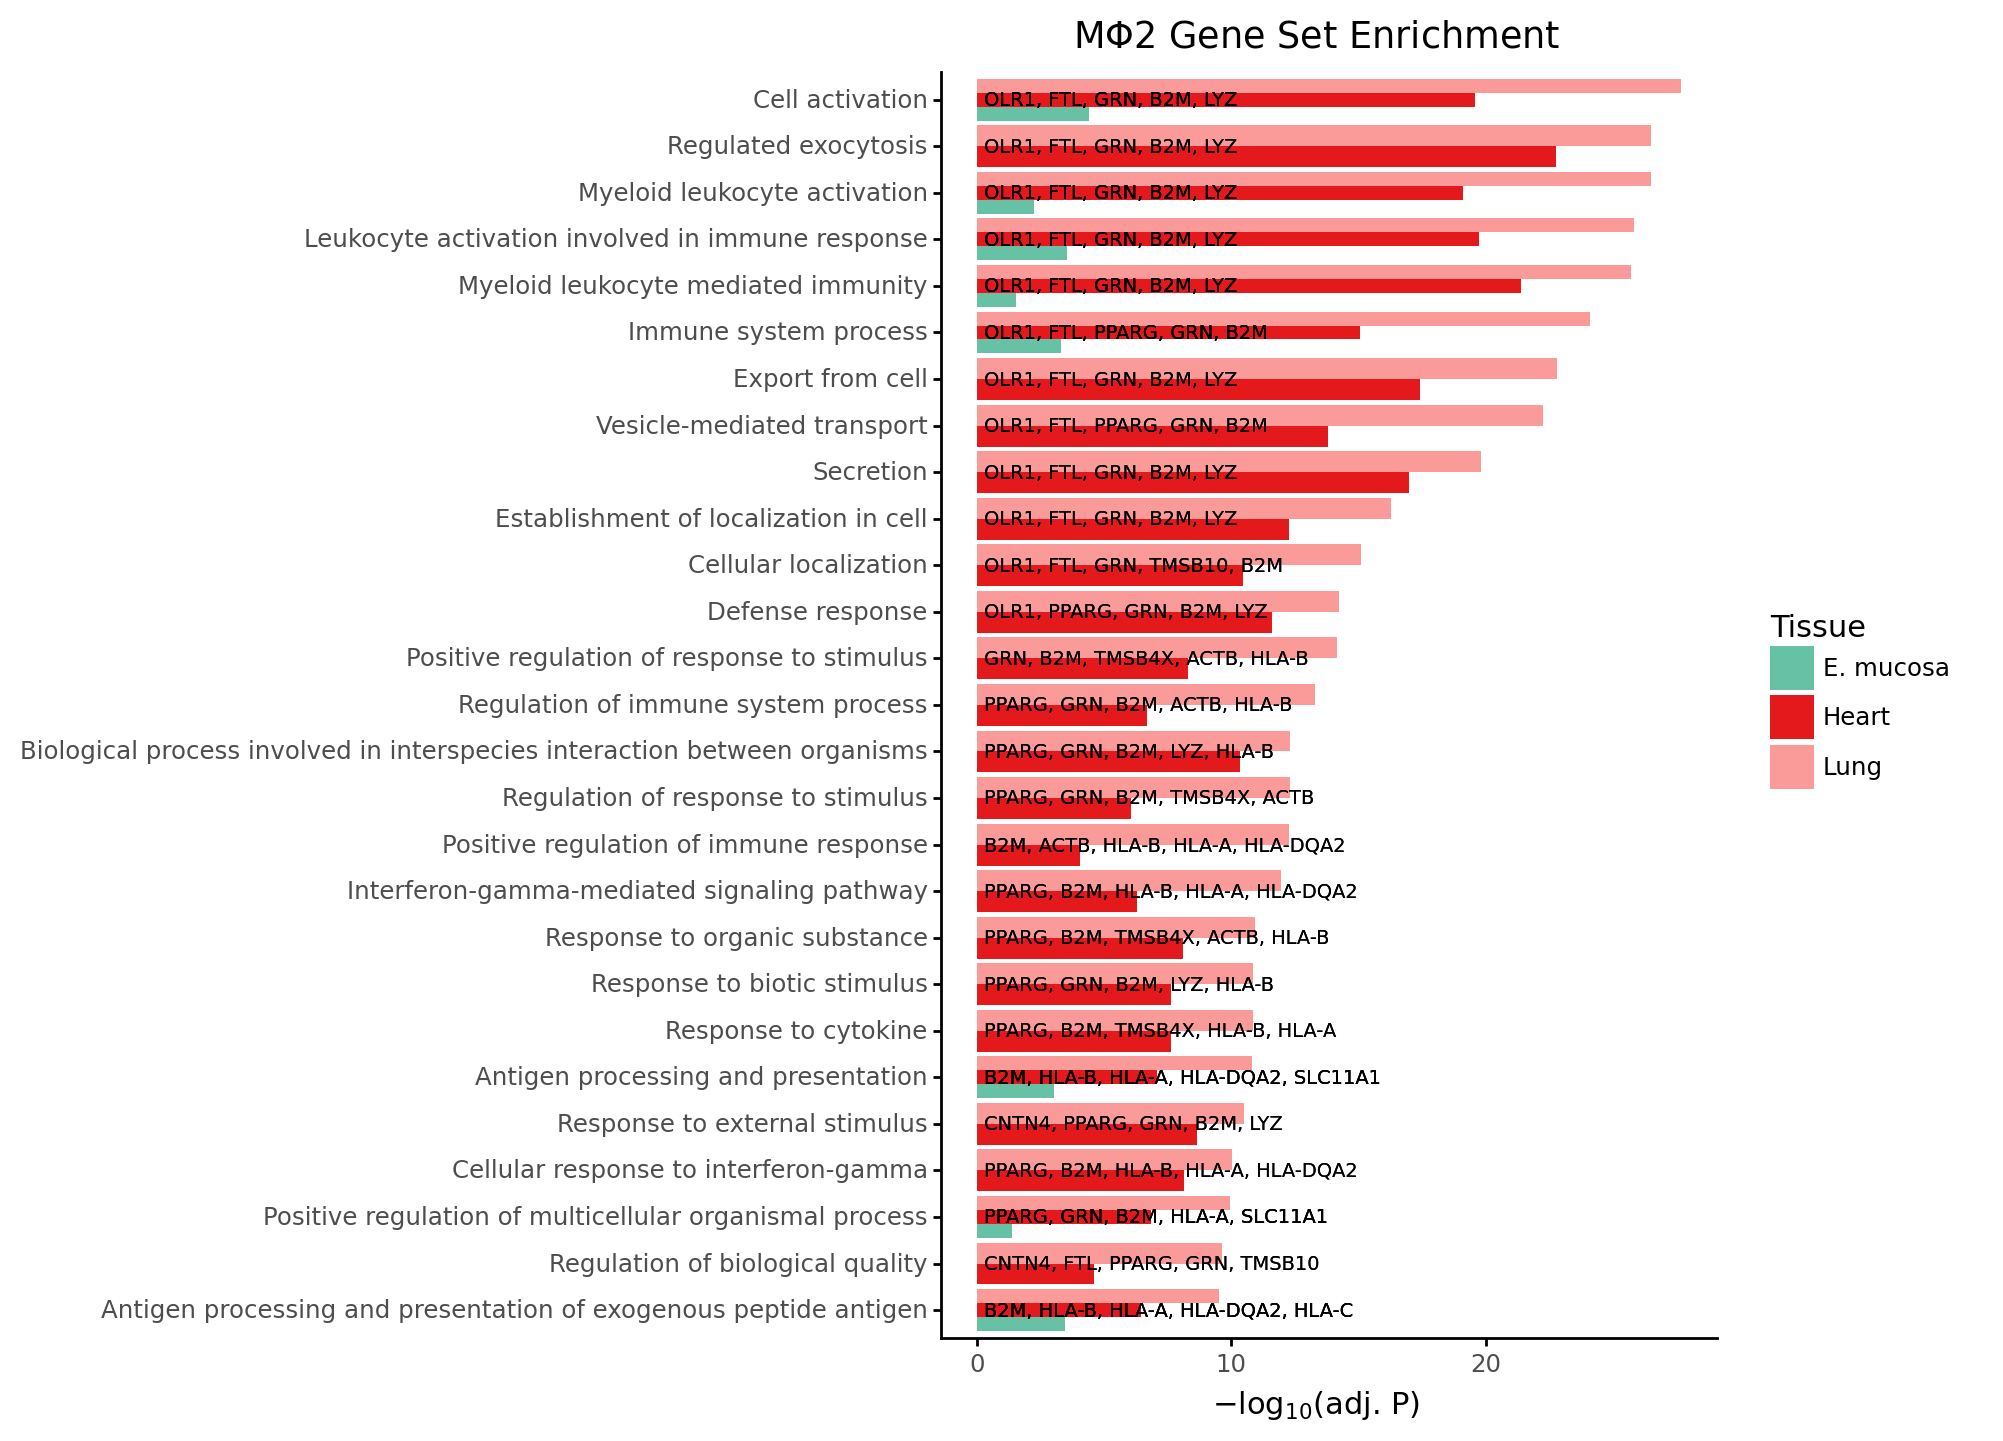

<ggplot: (8761273142625)>

/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 5 x 8.222222222222221 in image.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure/SFigure3-1K2.pdf


In [656]:
from plotnine import *

import matplotlib.patheffects as path_effects
pe = [path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()]

en_df = go_res_mac2[go_res_mac2.name.isin(ordered_terms)].copy()
en_df['tissue'] = pd.Categorical(en_df['tissue'], categories=ad.obs.Tissue.cat.categories)
en_df['intersections_append'] = [', '.join(x[:5]) for x in en_df.intersections_append]
#en_df['name'] = en_df['name'].astype(str) + ' ' + en_df['intersections'].astype(str)

#en_df = en_df.drop_duplicates('name')#[:20]
en_df['name'] = pd.Categorical(en_df['name'], categories=ordered_terms, ordered=True)

figsize = (5,len(en_df)/18)
text_start = (en_df.neglog10_pval.max()*0.01)

g = (
    ggplot(en_df, aes(x='name', y='neglog10_pval')) + 
    geom_bar(aes(fill='tissue'), stat='identity', position='dodge') + 
    #geom_hline(yintercept=1, size=0.1) +     
    geom_text(aes(x='name', y=text_start, label='intersections_append'), size=7, fontweight='normal', color='black', ha='left', data=en_df[['name', 'neglog10_pval', 'tissue', 'intersections_append']].drop_duplicates())+ #, path_effects=pe) +
    coord_flip() + 
    scale_x_discrete(limits=list(reversed(en_df.name.cat.categories))) +
    scale_fill_manual(ad.uns['tissue_colors']) +
    labs(fill='Tissue') +
    theme_classic() +
    theme(figure_size=figsize, panel_spacing_x=1) +
    labs(y='$-\log_{10}$(adj. P)', x='', title='M$\Phi2$ Gene Set Enrichment')
)

display(g)

ggsave(g, 'figure/SFigure3-1K2.pdf')

## Compare with Chakarov

In [657]:
lyve1lo = pd.read_excel('../Chakarov/aau0964_Table_S4.xlsx', index_col=0)
lyve1hi = pd.read_excel('../Chakarov/aau0964_Table_S5.xlsx', index_col=0)

/home/gokcen/.miniconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed


In [658]:
lhi = lyve1hi.human.str.split(',').explode().values[:100]
llo = lyve1lo.human.str.split(',').explode().values[:100]

In [659]:
de['chakarov'] = ['Lyve1lo MHCIIhi' if x in llo else 'non-DEG' for x in de.gene]
de['chakarov'].loc[de['chakarov'] == 'non-DEG'] = ['Lyve1hi MHCIIlo' if x in lhi else 'non-DEG' for x in de.gene.loc[de['chakarov'] == 'non-DEG']]

/home/gokcen/.miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [660]:
de.chakarov.unique()

array(['non-DEG', 'Lyve1hi MHCIIlo', 'Lyve1lo MHCIIhi'], dtype=object)

In [661]:
de['chakarov'] = pd.Categorical(de['chakarov'], categories=['Lyve1hi MHCIIlo', 'Lyve1lo MHCIIhi', 'non-DEG'])

In [662]:
de['chakarov'] = de['chakarov'].cat.rename_categories(['$Lyve1^{hi} MHCII^{lo}$', '$Lyve1^{lo} MHCII^{hi}$', 'NA'])

In [663]:
pd.crosstab([de[~de.undetected].Tissue, de[~de.undetected].significant, de[~de.undetected].mac1mac2], de.chakarov)

chakarov                        $Lyve1^{hi} MHCII^{lo}$  \
Tissue    significant mac1mac2                            
E. mucosa False       MΦ1                            34   
                      MΦ2                            16   
          True        MΦ1                             5   
                      MΦ2                             0   
Heart     False       MΦ1                            26   
                      MΦ2                            14   
          True        MΦ1                            13   
                      MΦ2                             5   
Lung      False       MΦ1                            20   
                      MΦ2                            18   
          True        MΦ1                            12   
                      MΦ2                             6   

chakarov                        $Lyve1^{lo} MHCII^{hi}$    NA  
Tissue    significant mac1mac2                                 
E. mucosa False       MΦ1                            19  2169  
                      MΦ2                            22  2478  
          True        MΦ1                             0    10  
                      MΦ2                            10   149  
Heart     False       MΦ1                             7  2758  
                      MΦ2                            34  2306  
          True        MΦ1                             1   141  
                      MΦ2                            11   233  
Lung      False       MΦ1                            10  3660  
                      MΦ2                            38  3572  
          True        MΦ1                             1   171  
                      MΦ2                            16   215

/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 18 x 5 in image.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure/SFigure3-1L.pdf


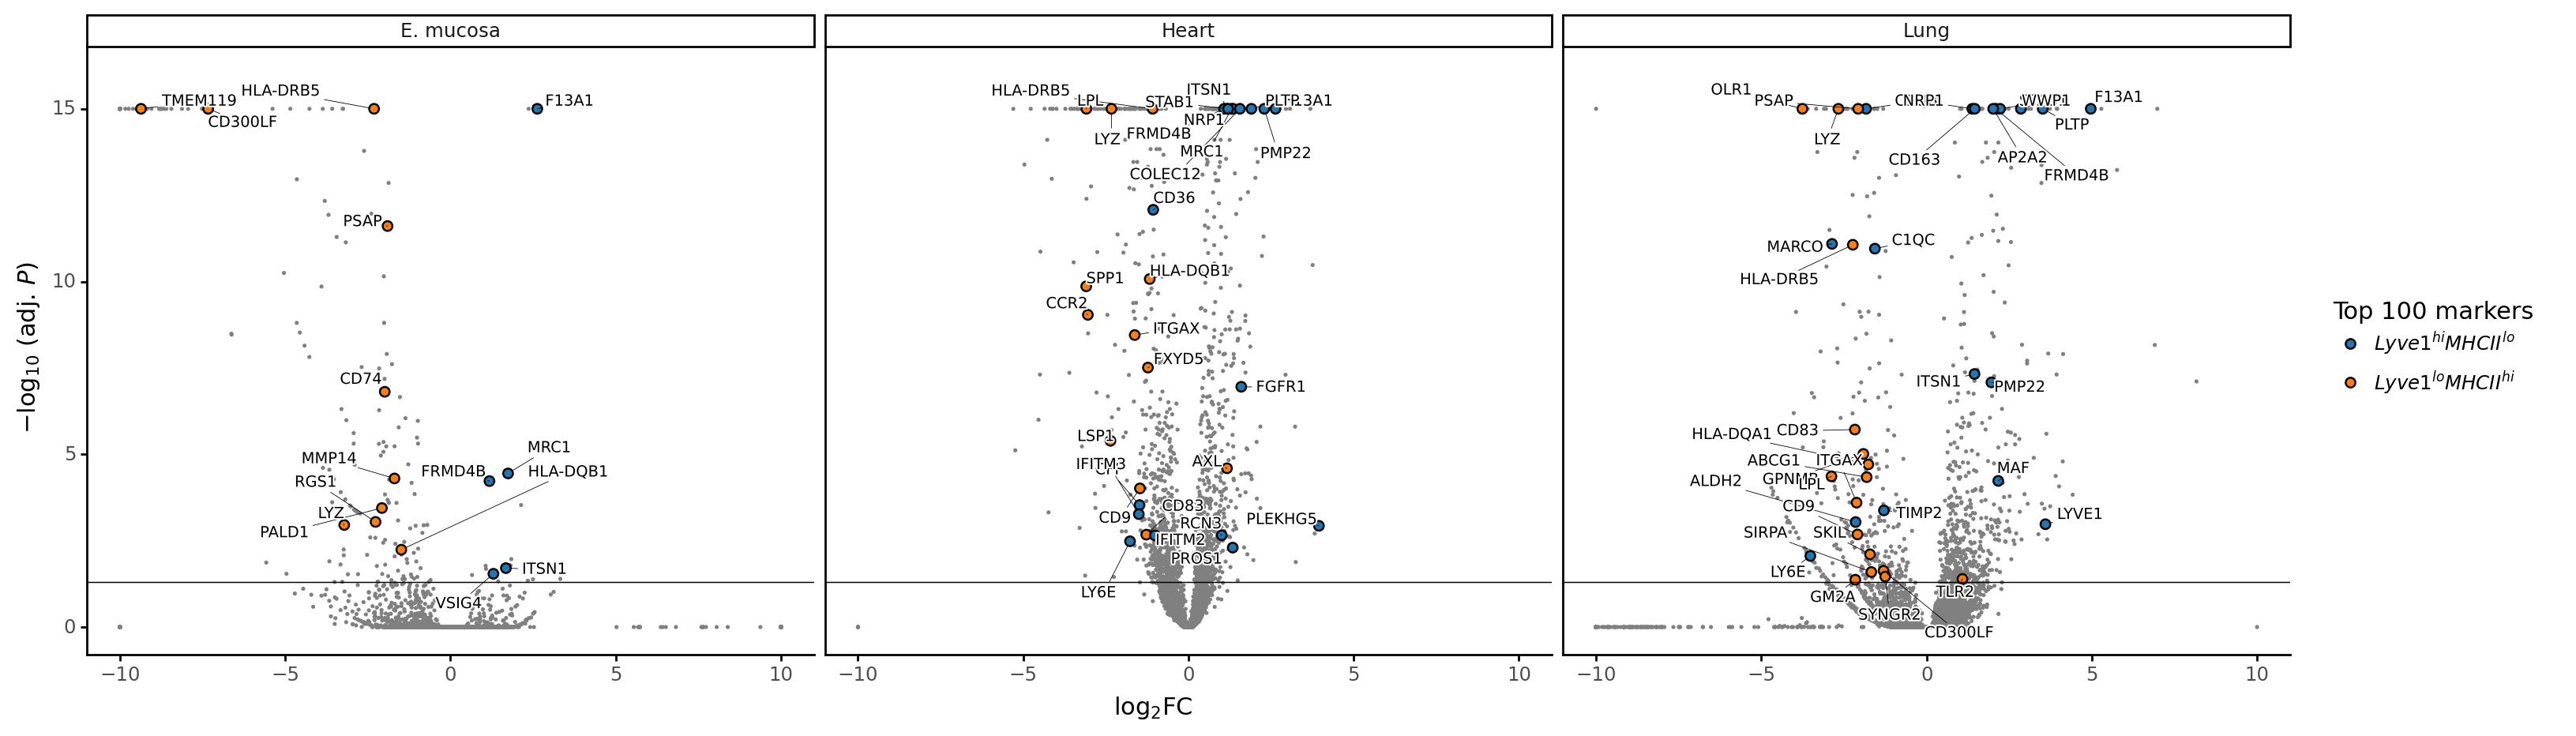

<ggplot: (8761326471021)>

In [664]:
from plotnine import *
import matplotlib.patheffects as pe

df_text_idx = (de.significant) & (de.chakarov!='NA')
text_df = de[df_text_idx]
text_df['chakarov'].cat.remove_unused_categories(inplace=True)
g = (
    ggplot(aes(x='log2fc', y='neglog_pval_adj'), data=de[de.significant]) + 
    geom_point(size=0.05, data=de[(~de.significant) & (~de.undetected)], color='gray', show_legend=False) +    
    geom_point(color='gray', size=0.05, data=de[de.significant&(de.chakarov=='NA')], show_legend=False) +
    geom_point(aes(fill='chakarov'), color='black', size=2, data=text_df) +    
    
    geom_hline(yintercept=(-np.log10(0.05)), size=0.3) +    
    geom_text(aes(label='gene'), size=7, color='black', fontweight='normal', data=text_df,
              path_effects=[pe.Stroke(linewidth=1.5, foreground='white'),pe.Normal()],
              adjust_text=
              {
                  'arrowprops':{'arrowstyle': '-', 'lw':0.3}, 
                  'x':de[de.significant].log2fc.values, 
                  'y':de[de.significant].neglog_pval_adj.values, 
                  'expand_points': (1,1.5),
              }
    ) + 
    theme_classic() + 
    facet_wrap('Tissue') +
    theme(figure_size=(18,5)) +
    labs(x='$\log_{2}$FC', y='$-\log_{10}$ (adj. $P$)', color='Tissue', fill='Top 100 markers') +
    scale_color_manual(values='black', drop=True) +
    scale_fill_cmap_d('tab10', drop=True) +    
    coord_cartesian(xlim=(-xlimit, xlimit), ylim=(None, 16))+
    guides(color = None)
)

g

## Venn

In [220]:
top = 100

emuc_mac2 = de[de.significant & (de.mac1mac2 == 'MΦ2') & (de.Tissue == 'E. mucosa')].sort_values('qval').gene.values[:top]
emuc_mac1 = de[de.significant & (de.mac1mac2 == 'MΦ1') & (de.Tissue == 'E. mucosa')].sort_values('qval').gene.values[:top]

heart_mac2 = de[de.significant & (de.mac1mac2 == 'MΦ2') & (de.Tissue == 'Heart')].sort_values('qval').gene.values[:top]
heart_mac1 = de[de.significant & (de.mac1mac2 == 'MΦ1') & (de.Tissue == 'Heart')].sort_values('qval').gene.values[:top]

lung_mac2 = de[de.significant & (de.mac1mac2 == 'MΦ2') & (de.Tissue == 'Lung')].sort_values('qval').gene.values[:top]
lung_mac1 = de[de.significant & (de.mac1mac2 == 'MΦ1') & (de.Tissue == 'Lung')].sort_values('qval').gene.values[:top]

In [221]:
(set(emuc_mac1) | set(lung_mac1) | set(heart_mac1)) & (set(emuc_mac2) | set(lung_mac2) | set(heart_mac2))

set()

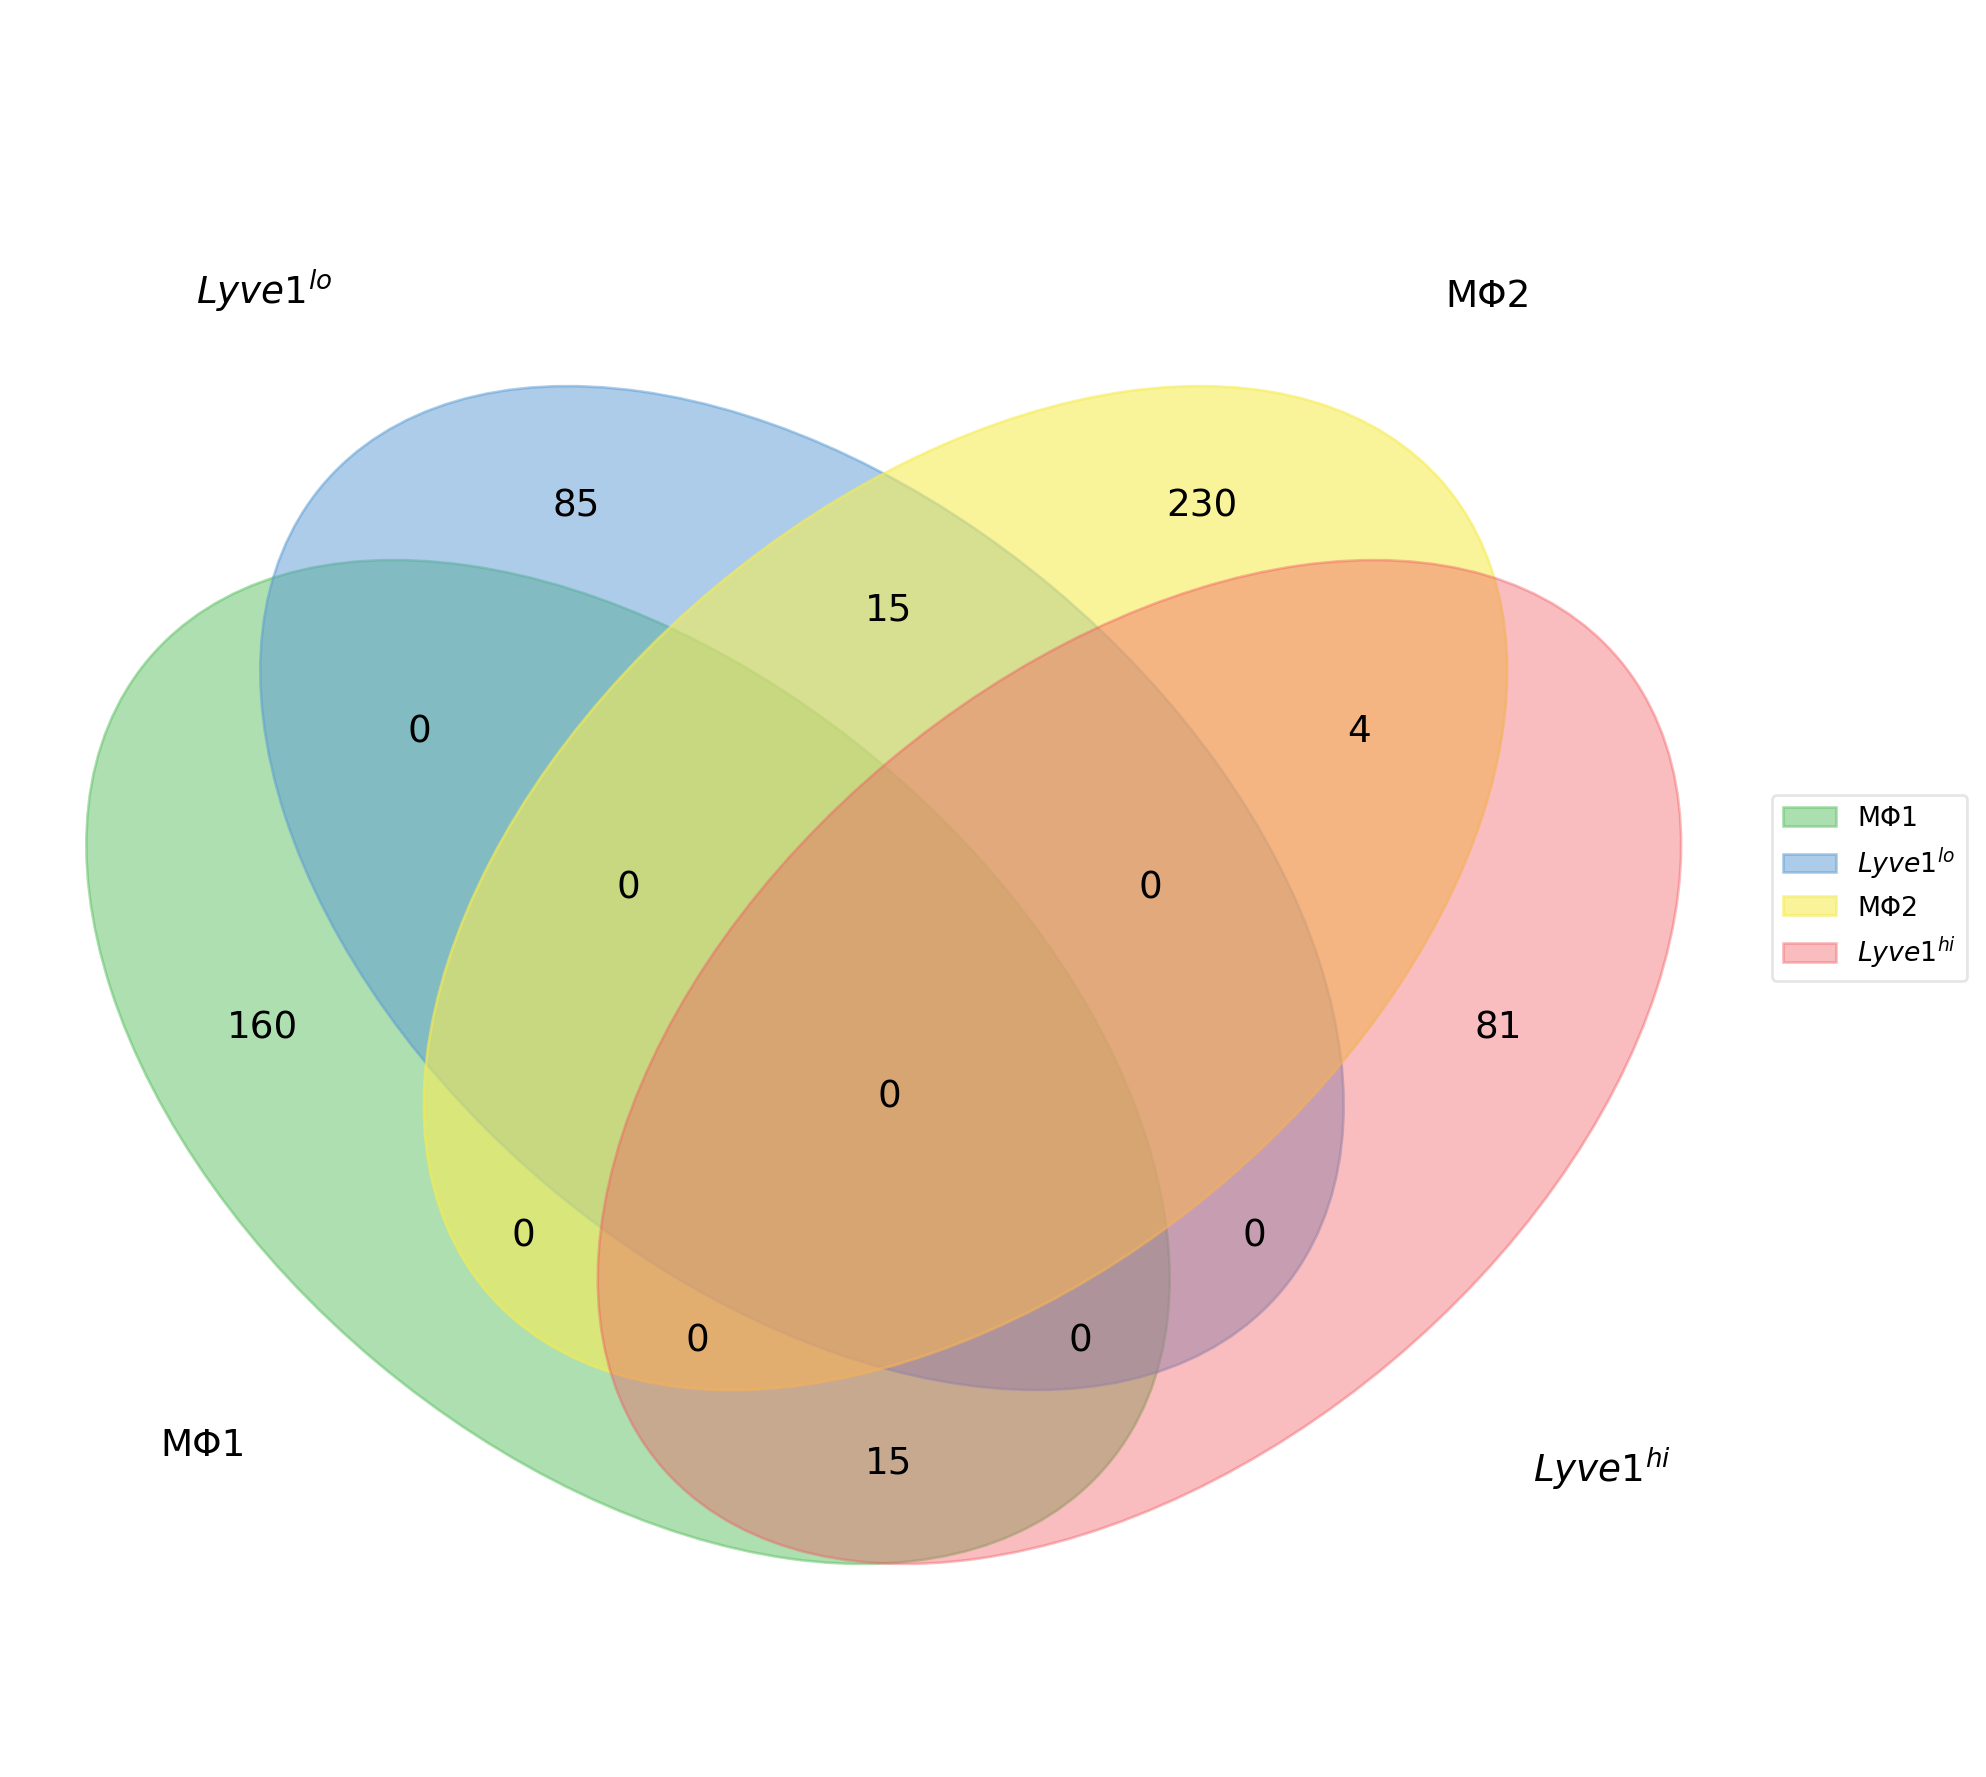

In [216]:
labels = venn.get_labels([
    set(emuc_mac1) | set(lung_mac1) | set(heart_mac1), 
    llo,     
    set(emuc_mac2) | set(lung_mac2) | set(heart_mac2),     
    lhi,
], fill=['number'])
fig, ax = venn.venn4(labels, names=['MΦ1', '$Lyve1^{lo}$', 'MΦ2', '$Lyve1^{hi}$'])
fig.show()